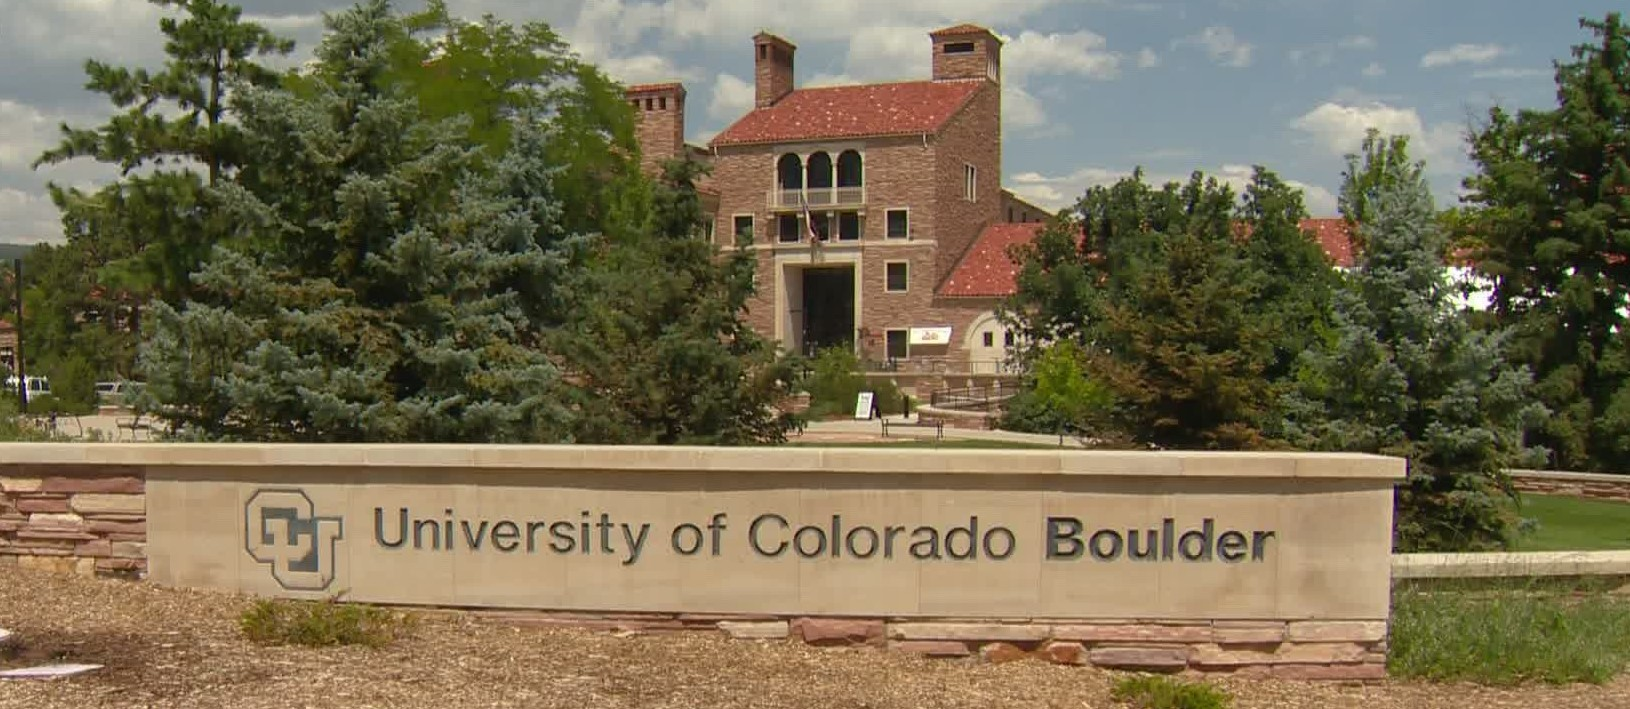

# Topic

This jupyter notebook is a project of the University of Colorado Boulder Master of Science in Data Science course DTSA-5511 - Introduction to Deep Learning.

It is based on the  Kaggle "Generative Dog Images" competition. Details about the competition and dataset could be found here: https://www.kaggle.com/competitions/generative-dog-images/overview

This Kaggle competition is about generating images with dogs. It is an excellent introduction to generative adversarial network (GAN). 

A generative adversarial network (GAN) is a class of machine learning system invented by Ian Goodfellow in 2014. Two neural networks compete with each other in a game. Given a training set, this technique learns to generate new data with the same statistics as the training set.

In this competition, you’ll be training generative models to create images of dogs. Only this time… there’s no ground truth data for you to predict. Here, you’ll submit the images and be scored based on how well those images are classified as dogs from pre-trained neural networks. Take these images, for example. Can you tell which are real vs. generated?

As base for this notebook I used the tensoflow tutorial "Deep Convolutional Generative Adversarial Network" (https://www.tensorflow.org/tutorials/generative/dcgan) as well as the getting started notebook from Kaggle for this competition (GAN dogs starter, https://www.kaggle.com/code/wendykan/gan-dogs-starter/notebook)

## Data
The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. Details about an dthe data could be found on following website: http://vision.stanford.edu/aditya86/ImageNetDogs/.

The train data could be also found at [Kaggle competition page](https://www.kaggle.com/competitions/generative-dog-images/data)

## Importing libraries

In [1]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

from tensorflow.keras.preprocessing.image import ImageDataGenerator


#import pandas as pd
# import numpy as np

# # for performace patch
# from sklearnex import patch_sklearn
# patch_sklearn() # withe larger no of trees kernel dies
 
# # disable  patching
# #from sklearnex import unpatch_sklearn
# #unpatch_sklearn()

# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d 
# import seaborn as sns
# from scipy.stats import mode

# import warnings
# warnings.filterwarnings('ignore')

# from time import time # to messure running time

# from sklearn import metrics
# from sklearn.metrics import accuracy_score, confusion_matrix

# from sklearn.model_selection import cross_val_score, GridSearchCV

# from sklearn.model_selection import train_test_split

# from sklearn.ensemble import RandomForestClassifier # Load random forest classifier 

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.decomposition import NMF

# import itertools # For iteration over found categories and assign best match

# import os

# set Kaggle API for download and submission
from kaggle.api.kaggle_api_extended import KaggleApi

## Exploratory Data Analysis (EDA)

## Download data

I downloaded the data locally and saved it into my workdir of the project. 

In [2]:
# User and API key is stored in config
import config

# set user and API key
os.environ['KAGGLE_USERNAME'] = config.KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = config.KAGGLE_KEY

api = KaggleApi()
api.authenticate()

In [3]:
# Download competition files in data directory
api.competition_download_files("generative-dog-images", path="data")

# unzip files
!unzip -d data "./data/generative-dog-images.zip"
#!rm "./data/nlp-getting-started.zip"

Archive:  ./data/generative-dog-images.zip
  inflating: data/Annotation.zip     
  inflating: data/all-dogs.zip       


In [5]:
!unzip -d data "./data/Annotation.zip"
!unzip -d data "./data/all-dogs.zip"

Archive:  ./data/Annotation.zip
   creating: data/Annotation/
   creating: data/Annotation/n02097658-silky_terrier/
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_98  
   creating: data/__MACOSX/
   creating: data/__MACOSX/Annotation/
   creating: data/__MACOSX/Annotation/n02097658-silky_terrier/
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_98  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_2535  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_2535  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_271  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_271  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_427  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_427  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_4890  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_4890  
  infla

  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_11118  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_4869  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_4869  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_8653  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_8653  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_1516  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_1516  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_6357  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_6357  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_611  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_611  
  inflating: data/Annotation/n02097658-silky_terrier/n02097658_9327  
  inflating: data/__MACOSX/Annotation/n02097658-silky_terrier/._n02097658_9327  
  inflating: d

  inflating: data/Annotation/n02113023-Pembroke/n02113023_9839  
  inflating: data/__MACOSX/Annotation/n02113023-Pembroke/._n02113023_9839  
  inflating: data/Annotation/n02113023-Pembroke/n02113023_11091  
  inflating: data/__MACOSX/Annotation/n02113023-Pembroke/._n02113023_11091  
  inflating: data/Annotation/n02113023-Pembroke/n02113023_4544  
  inflating: data/__MACOSX/Annotation/n02113023-Pembroke/._n02113023_4544  
  inflating: data/Annotation/n02113023-Pembroke/n02113023_4312  
  inflating: data/__MACOSX/Annotation/n02113023-Pembroke/._n02113023_4312  
  inflating: data/Annotation/n02113023-Pembroke/n02113023_5006  
  inflating: data/__MACOSX/Annotation/n02113023-Pembroke/._n02113023_5006  
  inflating: data/Annotation/n02113023-Pembroke/n02113023_4782  
  inflating: data/__MACOSX/Annotation/n02113023-Pembroke/._n02113023_4782  
  inflating: data/Annotation/n02113023-Pembroke/n02113023_12248  
  inflating: data/__MACOSX/Annotation/n02113023-Pembroke/._n02113023_12248  
  inflati

  inflating: data/__MACOSX/Annotation/n02105162-malinois/._n02105162_7790  
  inflating: data/Annotation/n02105162-malinois/n02105162_3595  
  inflating: data/__MACOSX/Annotation/n02105162-malinois/._n02105162_3595  
  inflating: data/Annotation/n02105162-malinois/n02105162_6013  
  inflating: data/__MACOSX/Annotation/n02105162-malinois/._n02105162_6013  
  inflating: data/Annotation/n02105162-malinois/n02105162_5299  
  inflating: data/__MACOSX/Annotation/n02105162-malinois/._n02105162_5299  
  inflating: data/Annotation/n02105162-malinois/n02105162_5252  
  inflating: data/__MACOSX/Annotation/n02105162-malinois/._n02105162_5252  
  inflating: data/Annotation/n02105162-malinois/n02105162_6275  
  inflating: data/__MACOSX/Annotation/n02105162-malinois/._n02105162_6275  
  inflating: data/Annotation/n02105162-malinois/n02105162_2873  
  inflating: data/__MACOSX/Annotation/n02105162-malinois/._n02105162_2873  
  inflating: data/Annotation/n02105162-malinois/n02105162_2079  
  inflating: 

  inflating: data/__MACOSX/Annotation/n02093991-Irish_terrier/._n02093991_2322  
  inflating: data/Annotation/n02093991-Irish_terrier/n02093991_122  
  inflating: data/__MACOSX/Annotation/n02093991-Irish_terrier/._n02093991_122  
  inflating: data/Annotation/n02093991-Irish_terrier/n02093991_4670  
  inflating: data/__MACOSX/Annotation/n02093991-Irish_terrier/._n02093991_4670  
  inflating: data/Annotation/n02093991-Irish_terrier/n02093991_114  
  inflating: data/__MACOSX/Annotation/n02093991-Irish_terrier/._n02093991_114  
  inflating: data/Annotation/n02093991-Irish_terrier/n02093991_1565  
  inflating: data/__MACOSX/Annotation/n02093991-Irish_terrier/._n02093991_1565  
  inflating: data/Annotation/n02093991-Irish_terrier/n02093991_3464  
  inflating: data/__MACOSX/Annotation/n02093991-Irish_terrier/._n02093991_3464  
  inflating: data/Annotation/n02093991-Irish_terrier/n02093991_2126  
  inflating: data/__MACOSX/Annotation/n02093991-Irish_terrier/._n02093991_2126  
  inflating: data

  inflating: data/Annotation/n02095570-Lakeland_terrier/n02095570_126  
  inflating: data/__MACOSX/Annotation/n02095570-Lakeland_terrier/._n02095570_126  
  inflating: data/Annotation/n02095570-Lakeland_terrier/n02095570_3035  
  inflating: data/__MACOSX/Annotation/n02095570-Lakeland_terrier/._n02095570_3035  
  inflating: data/Annotation/n02095570-Lakeland_terrier/n02095570_1765  
  inflating: data/__MACOSX/Annotation/n02095570-Lakeland_terrier/._n02095570_1765  
  inflating: data/Annotation/n02095570-Lakeland_terrier/n02095570_5365  
  inflating: data/__MACOSX/Annotation/n02095570-Lakeland_terrier/._n02095570_5365  
  inflating: data/Annotation/n02095570-Lakeland_terrier/n02095570_2524  
  inflating: data/__MACOSX/Annotation/n02095570-Lakeland_terrier/._n02095570_2524  
  inflating: data/Annotation/n02095570-Lakeland_terrier/n02095570_3253  
  inflating: data/__MACOSX/Annotation/n02095570-Lakeland_terrier/._n02095570_3253  
  inflating: data/Annotation/n02095570-Lakeland_terrier/n020

  inflating: data/__MACOSX/Annotation/n02091467-Norwegian_elkhound/._n02091467_2503  
  inflating: data/Annotation/n02091467-Norwegian_elkhound/n02091467_7085  
  inflating: data/__MACOSX/Annotation/n02091467-Norwegian_elkhound/._n02091467_7085  
  inflating: data/Annotation/n02091467-Norwegian_elkhound/n02091467_5184  
  inflating: data/__MACOSX/Annotation/n02091467-Norwegian_elkhound/._n02091467_5184  
  inflating: data/Annotation/n02091467-Norwegian_elkhound/n02091467_4631  
  inflating: data/__MACOSX/Annotation/n02091467-Norwegian_elkhound/._n02091467_4631  
  inflating: data/Annotation/n02091467-Norwegian_elkhound/n02091467_4636  
  inflating: data/__MACOSX/Annotation/n02091467-Norwegian_elkhound/._n02091467_4636  
  inflating: data/Annotation/n02091467-Norwegian_elkhound/n02091467_7281  
  inflating: data/__MACOSX/Annotation/n02091467-Norwegian_elkhound/._n02091467_7281  
  inflating: data/Annotation/n02091467-Norwegian_elkhound/n02091467_3880  
  inflating: data/__MACOSX/Annotat

  inflating: data/Annotation/n02107312-miniature_pinscher/n02107312_7677  
  inflating: data/__MACOSX/Annotation/n02107312-miniature_pinscher/._n02107312_7677  
  inflating: data/Annotation/n02107312-miniature_pinscher/n02107312_4692  
  inflating: data/__MACOSX/Annotation/n02107312-miniature_pinscher/._n02107312_4692  
  inflating: data/Annotation/n02107312-miniature_pinscher/n02107312_3823  
  inflating: data/__MACOSX/Annotation/n02107312-miniature_pinscher/._n02107312_3823  
  inflating: data/Annotation/n02107312-miniature_pinscher/n02107312_3020  
  inflating: data/__MACOSX/Annotation/n02107312-miniature_pinscher/._n02107312_3020  
  inflating: data/Annotation/n02107312-miniature_pinscher/n02107312_6136  
  inflating: data/__MACOSX/Annotation/n02107312-miniature_pinscher/._n02107312_6136  
  inflating: data/Annotation/n02107312-miniature_pinscher/n02107312_2702  
  inflating: data/__MACOSX/Annotation/n02107312-miniature_pinscher/._n02107312_2702  
  inflating: data/Annotation/n0210

  inflating: data/__MACOSX/Annotation/n02091635-otterhound/._n02091635_3916  
  inflating: data/Annotation/n02091635-otterhound/n02091635_2068  
  inflating: data/__MACOSX/Annotation/n02091635-otterhound/._n02091635_2068  
  inflating: data/Annotation/n02091635-otterhound/n02091635_1621  
  inflating: data/__MACOSX/Annotation/n02091635-otterhound/._n02091635_1621  
  inflating: data/Annotation/n02091635-otterhound/n02091635_1083  
  inflating: data/__MACOSX/Annotation/n02091635-otterhound/._n02091635_1083  
  inflating: data/Annotation/n02091635-otterhound/n02091635_470  
  inflating: data/__MACOSX/Annotation/n02091635-otterhound/._n02091635_470  
  inflating: data/Annotation/n02091635-otterhound/n02091635_3548  
  inflating: data/__MACOSX/Annotation/n02091635-otterhound/._n02091635_3548  
  inflating: data/Annotation/n02091635-otterhound/n02091635_663  
  inflating: data/__MACOSX/Annotation/n02091635-otterhound/._n02091635_663  
  inflating: data/Annotation/n02091635-otterhound/n02091

  inflating: data/Annotation/n02111277-Newfoundland/n02111277_1040  
  inflating: data/__MACOSX/Annotation/n02111277-Newfoundland/._n02111277_1040  
  inflating: data/Annotation/n02111277-Newfoundland/n02111277_2636  
  inflating: data/__MACOSX/Annotation/n02111277-Newfoundland/._n02111277_2636  
  inflating: data/Annotation/n02111277-Newfoundland/n02111277_6402  
  inflating: data/__MACOSX/Annotation/n02111277-Newfoundland/._n02111277_6402  
  inflating: data/Annotation/n02111277-Newfoundland/n02111277_1288  
  inflating: data/__MACOSX/Annotation/n02111277-Newfoundland/._n02111277_1288  
  inflating: data/Annotation/n02111277-Newfoundland/n02111277_6891  
  inflating: data/__MACOSX/Annotation/n02111277-Newfoundland/._n02111277_6891  
  inflating: data/Annotation/n02111277-Newfoundland/n02111277_5845  
  inflating: data/__MACOSX/Annotation/n02111277-Newfoundland/._n02111277_5845  
  inflating: data/Annotation/n02111277-Newfoundland/n02111277_3653  
  inflating: data/__MACOSX/Annotation

  inflating: data/__MACOSX/Annotation/n02096437-Dandie_Dinmont/._n02096437_612  
  inflating: data/Annotation/n02096437-Dandie_Dinmont/n02096437_4041  
  inflating: data/__MACOSX/Annotation/n02096437-Dandie_Dinmont/._n02096437_4041  
  inflating: data/Annotation/n02096437-Dandie_Dinmont/n02096437_29  
  inflating: data/__MACOSX/Annotation/n02096437-Dandie_Dinmont/._n02096437_29  
  inflating: data/Annotation/n02096437-Dandie_Dinmont/n02096437_429  
  inflating: data/__MACOSX/Annotation/n02096437-Dandie_Dinmont/._n02096437_429  
  inflating: data/Annotation/n02096437-Dandie_Dinmont/n02096437_871  
  inflating: data/__MACOSX/Annotation/n02096437-Dandie_Dinmont/._n02096437_871  
  inflating: data/Annotation/n02096437-Dandie_Dinmont/n02096437_1790  
  inflating: data/__MACOSX/Annotation/n02096437-Dandie_Dinmont/._n02096437_1790  
  inflating: data/Annotation/n02096437-Dandie_Dinmont/n02096437_1936  
  inflating: data/__MACOSX/Annotation/n02096437-Dandie_Dinmont/._n02096437_1936  
  inflati

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Archive:  ./data/all-dogs.zip
   creating: data/all-dogs/
  inflating: data/all-dogs/n02109961_16718.jpg  
  inflating: data/all-dogs/n02113799_5009.jpg  
  inflating: data/all-dogs/n02091032_6587.jpg  
  inflating: data/all-dogs/n02106166_1429.jpg  
  inflating: data/all-dogs/n02093754_2276.jpg  
  inflating: data/all-dogs/n02107683_4411.jpg  
  inflating: data/all-dogs/n02094114_2625.jpg  
  inflating: data/all-dogs/n02088094_8631.jpg  
  inflating: data/all-dogs/n02097130_1289.jpg  
  inflating: data/all-dogs/n02095314_3084.jpg  
  inflating: data/all-dogs/n02087046_178.jpg  
  inflating: data/all-dogs/n02110627_11435.jpg  
  inflating: data/all-dogs/n02099712_7411.jpg  
  inflating: data/all-dogs/n02088632_4360.jpg  
  inflating: data/all-dogs/n02105251_8384.jpg  
  inflating: data/all-dogs/n02085936_8767.jpg  
  inflating: data/all-dogs/n02093991_877.jpg  
  inflating: data/all-dogs/n02104029_4814.jpg  
  inflating: data/all-dogs/n02091032_212.jpg  
  inflating: data/all-dogs/n021

  inflating: data/all-dogs/n02097130_800.jpg  
  inflating: data/all-dogs/n02099429_3276.jpg  
  inflating: data/all-dogs/n02094433_478.jpg  
  inflating: data/all-dogs/n02107574_467.jpg  
  inflating: data/all-dogs/n02090622_906.jpg  
  inflating: data/all-dogs/n02106382_3856.jpg  
  inflating: data/all-dogs/n02090379_3427.jpg  
  inflating: data/all-dogs/n02099267_720.jpg  
  inflating: data/all-dogs/n02092339_3091.jpg  
  inflating: data/all-dogs/n02096051_6332.jpg  
  inflating: data/all-dogs/n02097209_737.jpg  
  inflating: data/all-dogs/n02108000_316.jpg  
  inflating: data/all-dogs/n02107312_6683.jpg  
  inflating: data/all-dogs/n02110806_479.jpg  
  inflating: data/all-dogs/n02089973_2404.jpg  
  inflating: data/all-dogs/n02092002_11105.jpg  
  inflating: data/all-dogs/n02104365_6140.jpg  
  inflating: data/all-dogs/n02113978_3734.jpg  
  inflating: data/all-dogs/n02095889_1255.jpg  
  inflating: data/all-dogs/n02086910_4518.jpg  
  inflating: data/all-dogs/n02096177_5117.jpg  

  inflating: data/all-dogs/n02095889_3047.jpg  
  inflating: data/all-dogs/n02107683_4558.jpg  
  inflating: data/all-dogs/n02105641_1618.jpg  
  inflating: data/all-dogs/n02116738_806.jpg  
  inflating: data/all-dogs/n02093859_2700.jpg  
  inflating: data/all-dogs/n02113186_11741.jpg  
  inflating: data/all-dogs/n02113978_553.jpg  
  inflating: data/all-dogs/n02085936_2465.jpg  
  inflating: data/all-dogs/n02101006_1249.jpg  
  inflating: data/all-dogs/n02100583_11119.jpg  
  inflating: data/all-dogs/n02093859_1209.jpg  
  inflating: data/all-dogs/n02098105_1228.jpg  
  inflating: data/all-dogs/n02099267_443.jpg  
  inflating: data/all-dogs/n02096177_5274.jpg  
  inflating: data/all-dogs/n02091467_3135.jpg  
  inflating: data/all-dogs/n02085936_19133.jpg  
  inflating: data/all-dogs/n02088632_562.jpg  
  inflating: data/all-dogs/n02111277_4654.jpg  
  inflating: data/all-dogs/n02093256_4452.jpg  
  inflating: data/all-dogs/n02101006_2026.jpg  
  inflating: data/all-dogs/n02111277_413.

  inflating: data/all-dogs/n02102040_2099.jpg  
  inflating: data/all-dogs/n02112018_5427.jpg  
  inflating: data/all-dogs/n02088632_982.jpg  
  inflating: data/all-dogs/n02116738_8945.jpg  
  inflating: data/all-dogs/n02098413_16861.jpg  
  inflating: data/all-dogs/n02093859_3140.jpg  
  inflating: data/all-dogs/n02099712_6318.jpg  
  inflating: data/all-dogs/n02112350_8045.jpg  
  inflating: data/all-dogs/n02106662_23996.jpg  
  inflating: data/all-dogs/n02107908_2357.jpg  
  inflating: data/all-dogs/n02102973_914.jpg  
  inflating: data/all-dogs/n02111500_124.jpg  
  inflating: data/all-dogs/n02095570_5796.jpg  
  inflating: data/all-dogs/n02106166_7329.jpg  
  inflating: data/all-dogs/n02096294_3494.jpg  
  inflating: data/all-dogs/n02113624_2784.jpg  
  inflating: data/all-dogs/n02095889_6307.jpg  
  inflating: data/all-dogs/n02113186_7308.jpg  
  inflating: data/all-dogs/n02097209_2276.jpg  
  inflating: data/all-dogs/n02096177_4420.jpg  
  inflating: data/all-dogs/n02100735_3595

  inflating: data/all-dogs/n02093428_9538.jpg  
  inflating: data/all-dogs/n02102480_5070.jpg  
  inflating: data/all-dogs/n02108915_2899.jpg  
  inflating: data/all-dogs/n02095570_6114.jpg  
  inflating: data/all-dogs/n02088466_9356.jpg  
  inflating: data/all-dogs/n02106382_2740.jpg  
  inflating: data/all-dogs/n02097658_6289.jpg  
  inflating: data/all-dogs/n02102318_3511.jpg  
  inflating: data/all-dogs/n02085782_3387.jpg  
  inflating: data/all-dogs/n02090622_5890.jpg  
  inflating: data/all-dogs/n02115913_1578.jpg  
  inflating: data/all-dogs/n02089078_404.jpg  
  inflating: data/all-dogs/n02093428_10908.jpg  
  inflating: data/all-dogs/n02113712_3300.jpg  
  inflating: data/all-dogs/n02111889_1739.jpg  
  inflating: data/all-dogs/n02088094_1823.jpg  
  inflating: data/all-dogs/n02105162_575.jpg  
  inflating: data/all-dogs/n02099429_569.jpg  
  inflating: data/all-dogs/n02111500_3011.jpg  
  inflating: data/all-dogs/n02109961_5066.jpg  
  inflating: data/all-dogs/n02099712_1930.

  inflating: data/all-dogs/n02093859_746.jpg  
  inflating: data/all-dogs/n02089867_600.jpg  
  inflating: data/all-dogs/n02097658_1227.jpg  
  inflating: data/all-dogs/n02111500_1879.jpg  
  inflating: data/all-dogs/n02090721_2550.jpg  
  inflating: data/all-dogs/n02097474_8132.jpg  
  inflating: data/all-dogs/n02088238_13222.jpg  
  inflating: data/all-dogs/n02089867_614.jpg  
  inflating: data/all-dogs/n02087394_7875.jpg  
  inflating: data/all-dogs/n02096294_1805.jpg  
  inflating: data/all-dogs/n02091244_5488.jpg  
  inflating: data/all-dogs/n02085620_1816.jpg  
  inflating: data/all-dogs/n02111277_6143.jpg  
  inflating: data/all-dogs/n02085936_2203.jpg  
  inflating: data/all-dogs/n02113712_112.jpg  
  inflating: data/all-dogs/n02088238_2646.jpg  
  inflating: data/all-dogs/n02086079_606.jpg  
  inflating: data/all-dogs/n02097658_2048.jpg  
  inflating: data/all-dogs/n02091467_1144.jpg  
  inflating: data/all-dogs/n02106166_1460.jpg  
  inflating: data/all-dogs/n02086910_7514.jp

  inflating: data/all-dogs/n02105505_32.jpg  
  inflating: data/all-dogs/n02094258_237.jpg  
  inflating: data/all-dogs/n02107908_94.jpg  
  inflating: data/all-dogs/n02088466_2934.jpg  
  inflating: data/all-dogs/n02091244_5895.jpg  
  inflating: data/all-dogs/n02100877_5286.jpg  
  inflating: data/all-dogs/n02091635_1340.jpg  
  inflating: data/all-dogs/n02101006_1832.jpg  
  inflating: data/all-dogs/n02107683_3694.jpg  
  inflating: data/all-dogs/n02108000_2420.jpg  
  inflating: data/all-dogs/n02099267_4506.jpg  
  inflating: data/all-dogs/n02106662_1637.jpg  
  inflating: data/all-dogs/n02091134_1131.jpg  
  inflating: data/all-dogs/n02105855_1963.jpg  
  inflating: data/all-dogs/n02091134_16890.jpg  
  inflating: data/all-dogs/n02097474_8491.jpg  
  inflating: data/all-dogs/n02090622_6123.jpg  
  inflating: data/all-dogs/n02109047_31830.jpg  
  inflating: data/all-dogs/n02088238_10288.jpg  
  inflating: data/all-dogs/n02098413_4531.jpg  
  inflating: data/all-dogs/n02113186_4924.

  inflating: data/all-dogs/n02095570_104.jpg  
  inflating: data/all-dogs/n02097047_2551.jpg  
  inflating: data/all-dogs/n02101006_2516.jpg  
  inflating: data/all-dogs/n02116738_8095.jpg  
  inflating: data/all-dogs/n02091467_5074.jpg  
  inflating: data/all-dogs/n02093754_1460.jpg  
  inflating: data/all-dogs/n02088094_4314.jpg  
  inflating: data/all-dogs/n02093256_2513.jpg  
  inflating: data/all-dogs/n02091134_9398.jpg  
  inflating: data/all-dogs/n02093754_5606.jpg  
  inflating: data/all-dogs/n02108000_1904.jpg  
  inflating: data/all-dogs/n02109525_13420.jpg  
  inflating: data/all-dogs/n02087046_267.jpg  
  inflating: data/all-dogs/n02111129_2047.jpg  
  inflating: data/all-dogs/n02112137_8759.jpg  
  inflating: data/all-dogs/n02097298_8558.jpg  
  inflating: data/all-dogs/n02111129_3359.jpg  
  inflating: data/all-dogs/n02097209_1063.jpg  
  inflating: data/all-dogs/n02106382_1806.jpg  
  inflating: data/all-dogs/n02097130_1828.jpg  
  inflating: data/all-dogs/n02109961_1210

  inflating: data/all-dogs/n02113186_694.jpg  
  inflating: data/all-dogs/n02113712_3293.jpg  
  inflating: data/all-dogs/n02091831_2391.jpg  
  inflating: data/all-dogs/n02105855_15506.jpg  
  inflating: data/all-dogs/n02105412_2496.jpg  
  inflating: data/all-dogs/n02090721_4015.jpg  
  inflating: data/all-dogs/n02100583_1600.jpg  
  inflating: data/all-dogs/n02092339_327.jpg  
  inflating: data/all-dogs/n02110627_8250.jpg  
  inflating: data/all-dogs/n02113799_1474.jpg  
  inflating: data/all-dogs/n02092002_4296.jpg  
  inflating: data/all-dogs/n02107312_105.jpg  
  inflating: data/all-dogs/n02109525_5498.jpg  
  inflating: data/all-dogs/n02098286_43.jpg  
  inflating: data/all-dogs/n02111277_341.jpg  
  inflating: data/all-dogs/n02095570_6093.jpg  
  inflating: data/all-dogs/n02109047_32010.jpg  
  inflating: data/all-dogs/n02086240_1687.jpg  
  inflating: data/all-dogs/n02087046_5305.jpg  
  inflating: data/all-dogs/n02105855_13611.jpg  
  inflating: data/all-dogs/n02094114_445.jp

  inflating: data/all-dogs/n02112018_12513.jpg  
  inflating: data/all-dogs/n02101388_10290.jpg  
  inflating: data/all-dogs/n02091831_55.jpg  
  inflating: data/all-dogs/n02105641_2052.jpg  
  inflating: data/all-dogs/n02104365_7518.jpg  
  inflating: data/all-dogs/n02096294_250.jpg  
  inflating: data/all-dogs/n02105162_6690.jpg  
  inflating: data/all-dogs/n02085782_1774.jpg  
  inflating: data/all-dogs/n02098286_6245.jpg  
  inflating: data/all-dogs/n02107908_4885.jpg  
  inflating: data/all-dogs/n02098105_2462.jpg  
  inflating: data/all-dogs/n02107142_6816.jpg  
  inflating: data/all-dogs/n02110958_8513.jpg  
  inflating: data/all-dogs/n02089973_4055.jpg  
  inflating: data/all-dogs/n02109525_11444.jpg  
  inflating: data/all-dogs/n02113978_3714.jpg  
  inflating: data/all-dogs/n02116738_6813.jpg  
  inflating: data/all-dogs/n02085936_1549.jpg  
  inflating: data/all-dogs/n02090721_4362.jpg  
  inflating: data/all-dogs/n02090721_272.jpg  
  inflating: data/all-dogs/n02115641_8168

  inflating: data/all-dogs/n02086240_5546.jpg  
  inflating: data/all-dogs/n02099267_2447.jpg  
  inflating: data/all-dogs/n02102177_661.jpg  
  inflating: data/all-dogs/n02104029_2501.jpg  
  inflating: data/all-dogs/n02099849_3617.jpg  
  inflating: data/all-dogs/n02086240_3137.jpg  
  inflating: data/all-dogs/n02108000_2110.jpg  
  inflating: data/all-dogs/n02085936_8756.jpg  
  inflating: data/all-dogs/n02096437_2224.jpg  
  inflating: data/all-dogs/n02106166_2111.jpg  
  inflating: data/all-dogs/n02085936_7465.jpg  
  inflating: data/all-dogs/n02097130_2969.jpg  
  inflating: data/all-dogs/n02106166_355.jpg  
  inflating: data/all-dogs/n02105251_7086.jpg  
  inflating: data/all-dogs/n02113978_3249.jpg  
  inflating: data/all-dogs/n02105056_4173.jpg  
  inflating: data/all-dogs/n02111277_6885.jpg  
  inflating: data/all-dogs/n02096051_3051.jpg  
  inflating: data/all-dogs/n02111277_7225.jpg  
  inflating: data/all-dogs/n02088238_10753.jpg  
  inflating: data/all-dogs/n02098286_771.

## Importing data, cleaning and analysis

### Import data and get first overview


In [51]:
# Create data input from flies with keras image generator flow
#BATCH_SIZE = 1024
BATCH_SIZE = 4096
#BATCH_SIZE = 20580  --> OOM

train_datagen = ImageDataGenerator(
#        featurewise_center=True,
        samplewise_center=True,
        samplewise_std_normalization=True,
#        validation_split=0.2,
        dtype='float32',
        rotation_range=20,
#        horizontal_flip=True,
        vertical_flip=True
        )


train_generator = train_datagen.flow_from_directory(
    directory="./data",
#    target_size = (64, 64), # This is taget size for submission
    target_size = (28, 28),
#    subset='training',
#    color_mode='rgb',
    color_mode='grayscale',
    classes=None,
    #class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    save_to_dir=None,
    interpolation='nearest',
)

Found 20579 images belonging to 1 classes.


## Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

### The Generator

The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise). Start with a `Dense` layer that takes this seed as input, then upsample several times until you reach the desired image size of 28x28x1. Notice the `tf.keras.layers.LeakyReLU` activation for each layer, except the output layer which uses tanh.

In [5]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Use the (as yet untrained) generator to create an image.

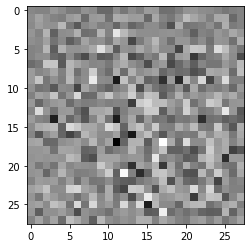

In [6]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [10]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

### The Discriminator

The discriminator is a CNN-based image classifier.

In [11]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [12]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00189266]], shape=(1, 1), dtype=float32)


In [13]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

## Define the loss and optimizers

Define loss functions and optimizers for both models.

In [14]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [15]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, compare the discriminators decisions on the generated images to an array of 1s.

In [16]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since you will train two networks separately.

In [17]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save checkpoints
This notebook also demonstrates how to save and restore models, which can be helpful in case a long running training task is interrupted.

In [18]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Define the training loop

In [19]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [20]:
# global dataframe with loss
#loss = pd.DataFrame(columns=['gen_loss', 'disc_loss'])

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    # change global dataframe with loss
    global loss
    
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        
#         d = {'gen_loss': [gen_loss], 'disc_loss': [disc_loss]}
#         pd.concat([loss, df2])
#        loss.loc[len(loss.index)-1] = [tf.reduce_sum(gen_loss).eval(), tf.reduce_sum(disc_loss).eval()]
        

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [21]:
def train(dataset, epochs, iniepochs=0):
    fulltime = 0
    for epoch in range(epochs):
        start = time.time()
        batches = 0

        for image_batch, y in dataset:
            train_step(image_batch/255)

            batches += 1
#            print("next step, ", image_batch.shape)
            
            if batches >= 20579 / BATCH_SIZE:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break


        # Produce images for the GIF as you go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch+iniepochs + 1,
                                 seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
              checkpoint.save(file_prefix = checkpoint_prefix)
        
        print ('Time for epoch {} is {} sec'.format(epoch+iniepochs + 1, time.time()-start))
        fulltime += time.time()-start
        print ('Time so far is {} sec'.format(fulltime))
#        print ('Generator loss: ', loss.loc[len(loss.index)-1].gen_loss, 'Discriminator loss: ',loss.loc[len(loss.index)-1].disc_loss)

    # Generate after the final epoch
#     display.clear_output(wait=True)
#     generate_and_save_images(generator,
#                                epochs,
#                               seed)

**Generate and save images**

In [22]:
def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(10, 10))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        #plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.imshow(predictions[i, :, :, 0] * 255, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits. This may take about one minute / epoch with the default settings on Colab.

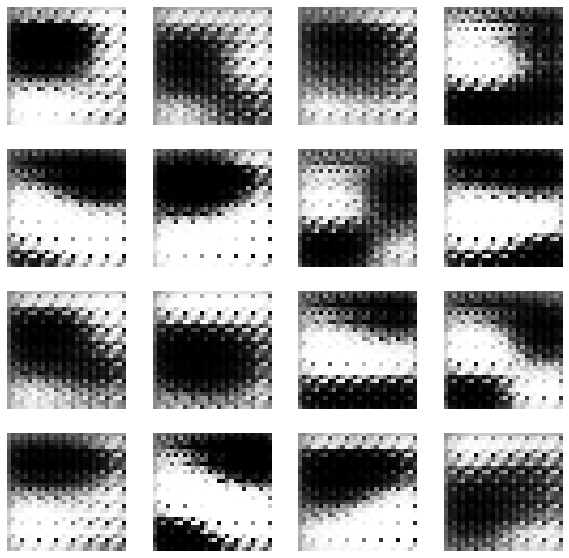

In [23]:
train(train_generator, epochs=EPOCHS, iniepochs=0)

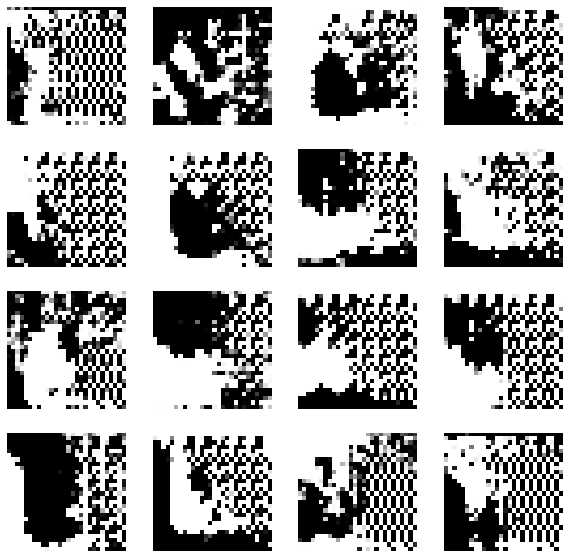

Time for epoch 2000 is 41.10851740837097 sec
Time so far is 20597.801152706146 sec


In [54]:
# continue training
train(train_generator, epochs=500, iniepochs=1500)

Restore the latest checkpoint.

In [64]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Create a GIF

In [86]:
# Display a single image using the epoch number
def display_image(epoch_no):
    return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

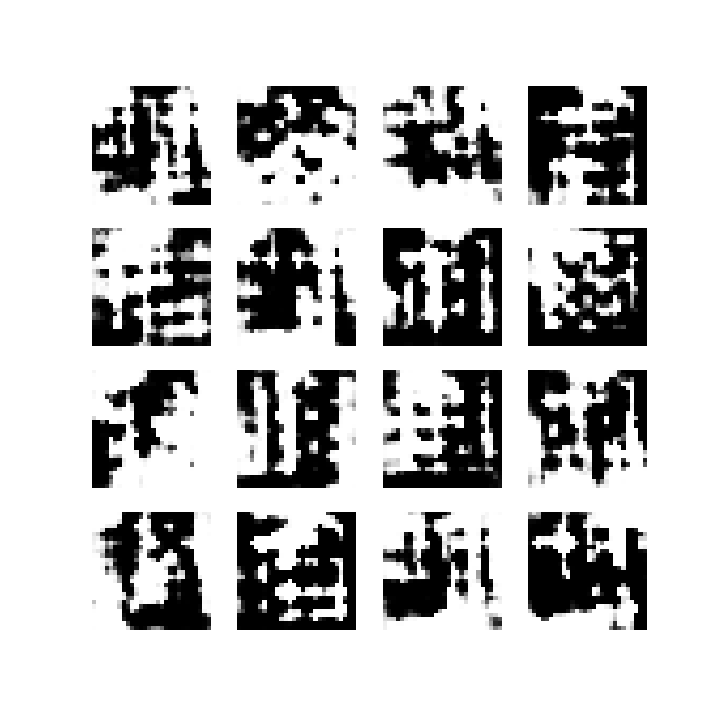

In [48]:
display_image(500)

Use `imageio` to create an animated gif using the images saved during training.

In [ ]:
# To generate GIFs
!pip install imageio

In [49]:
import imageio

In [55]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [51]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

ModuleNotFoundError: No module named 'tensorflow_docs'

# Change Network to final size of 64x64 and colour images

In [59]:
# Create data input from flies with keras image generator flow
BATCH_SIZE = 128
#BATCH_SIZE = 256 --> OOM
#BATCH_SIZE = 512 --> OOM
#BATCH_SIZE = 1024 --> OOM
#BATCH_SIZE = 4096 --> OOM
#BATCH_SIZE = 20580  --> OOM

train_datagen = ImageDataGenerator(
#        featurewise_center=True,
#        samplewise_center=True,
#        samplewise_std_normalization=True,
#        validation_split=0.2,
        dtype='float32',
        rotation_range=20,
        horizontal_flip=True,
#        vertical_flip=True
        )


train_generator = train_datagen.flow_from_directory(
    directory="./data",
    target_size = (64, 64), # This is taget size for submission
#    target_size = (28, 28),
#    subset='training',
    color_mode='rgb',
#    color_mode='grayscale',
    classes=None,
    #class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
#    seed=42,
    save_to_dir=None,
    interpolation='nearest',
)

Found 20579 images belonging to 1 classes.


In [34]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*1024, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 1024)))

    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.GaussianNoise(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.GaussianNoise(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.GaussianNoise(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    #model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='sigmoid')) 

    return model

TensorShape([1, 64, 64, 3])

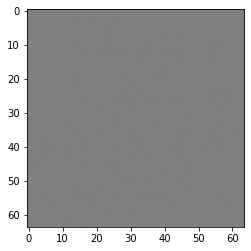

In [35]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False) * 0.5 + 0.5 # because of -1/1 from tanh

#plt.imshow(generated_image[0, :, :, 0], cmap='gray')
#plt.imshow(generated_image[0, :, :, 0])
plt.imshow(generated_image[0, :, :, :])
generated_image.shape
#generated_image[0, :, :, :] * 127,5

In [36]:
generator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 65536)             6553600   
                                                                 
 batch_normalization_7 (Batc  (None, 65536)            262144    
 hNormalization)                                                 
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 65536)             0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 1024)        0         
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 8, 8, 256)        6553600   
 ranspose)                                                       
                                                                 
 gaussian_noise (GaussianNoi  (None, 8, 8, 256)       

In [37]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(1024, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
  
    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [38]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00400712]], shape=(1, 1), dtype=float32)


In [39]:
discriminator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 256)       19456     
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 32, 32, 256)       0         
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 256)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 512)       3277312   
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 16, 16, 512)       0         
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 512)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 1024)       

In [69]:
# global dataframe with loss
#loss = pd.DataFrame(columns=['gen_loss', 'disc_loss'])

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    # change global dataframe with loss
    global loss
    
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True) * 0.5 + 0.5 # because of -1/1 from tanh

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        
#         d = {'gen_loss': [gen_loss], 'disc_loss': [disc_loss]}
#         pd.concat([loss, df2])
#        loss.loc[len(loss.index)-1] = [tf.reduce_sum(gen_loss).eval(), tf.reduce_sum(disc_loss).eval()]
        

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [70]:
def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)* 0.5 + 0.5 # because of -1/1 from tanh

    fig = plt.figure(figsize=(10, 10))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        #plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
        plt.imshow(predictions[i, :, :, :])
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

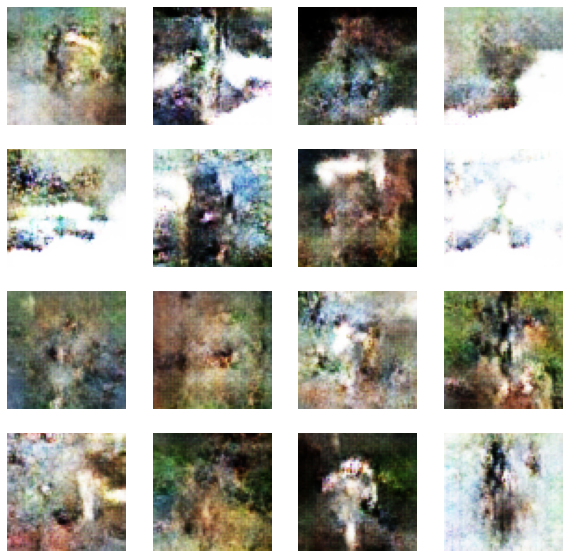

Time for epoch 329 is 261.68688464164734 sec
Time so far is 85235.76094126701 sec


In [ ]:
train(train_generator, epochs=500, iniepochs=0)

In [ ]:
# continue training
train(train_generator, epochs=450, iniepochs=50)

In [ ]:
# continue training
train(train_generator, epochs=50, iniepochs=675)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


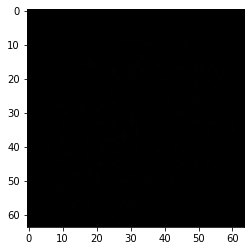

In [42]:
generated_image = generator(seed, training=False)

plt.imshow(generated_image[2, :, :, :])
#generated_image[0, :, :, :]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TensorShape([1, 64, 64, 3])

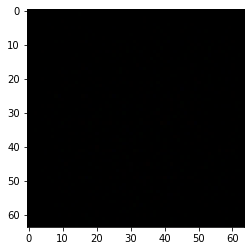

In [43]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

#plt.imshow(generated_image[0, :, :, 0], cmap='gray')
#plt.imshow(generated_image[0, :, :, 0])
plt.imshow(generated_image[0, :, :, :])
generated_image.shape
#generated_image[0, :, :, :] * 127,5

In [121]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

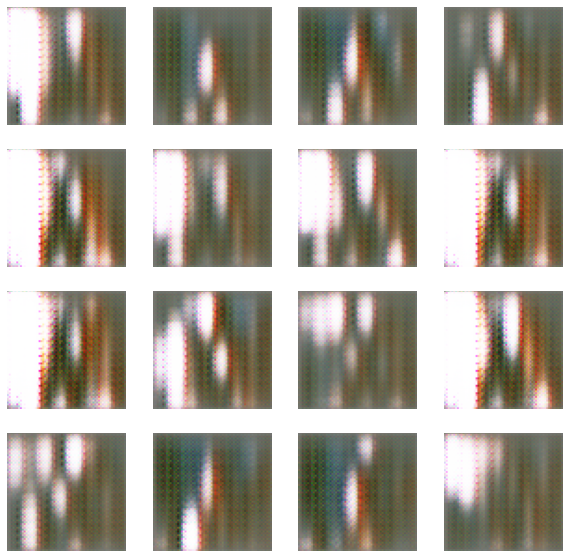

In [122]:
noise_dim = 100
num_examples_to_generate = 25

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

generated_image = generator(seed, training=False)
fig = plt.figure(figsize=(10, 10))

for i in range(generated_image.shape[0]):
        plt.subplot(5, 5, i+1)
        #plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
        plt.imshow(generated_image[i, :, :, :])
        plt.axis('off')


In [68]:
np.min(train_generator[0][0][2]/255)

0.036624987

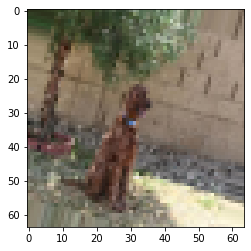

In [66]:
plt.imshow(train_generator[0][0][2]/255)

In [46]:
generator

## Conclusion
....